In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as se

In [2]:
df=pd.read_excel("myexcel.xlsx")

In [3]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [5]:
df.describe(include="all")

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,458,458,458.000000,458,458.000000,458,458.000000,374,4.470000e+02
unique,458,30,NaN,5,NaN,18,NaN,118,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,2023-09-06 00:00:00,NaN,Kentucky,NaN
freq,1,19,NaN,102,NaN,59,NaN,22,NaN
mean,NaN,NaN,17.713974,NaN,26.934498,NaN,221.543668,NaN,4.833970e+06
std,NaN,NaN,15.966837,NaN,4.400128,NaN,26.343200,NaN,5.226620e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,NaN,200.000000,NaN,1.025210e+06
50%,NaN,NaN,13.000000,NaN,26.000000,NaN,220.000000,NaN,2.836186e+06
75%,NaN,NaN,25.000000,NaN,30.000000,NaN,240.000000,NaN,6.500000e+06


In [6]:
# changing the data of that particular column with any random numbers between 150 and 180.
df["Height"]=np.random.randint(150,180,size=len(df))
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,166,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,159,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,168,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,161,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,164,231,NaN,5000000.0


# 1. How many are there in each Team and the percentage splitting with respect to the total employees.

In [8]:
#total no of employees
no_of_emp=df["Name"].count()
# number of employees in each team
team_count=df['Team'].value_counts()

# percentage splitting
percentage_split=(team_count/no_of_emp)*100

team_details=pd.DataFrame({'Team': team_count.index, 'NO: of employees' : team_count.values, 'Percentage split' : percentage_split.values})
print(team_details)
#team_count
#percentage_split

                      Team  NO: of employees  Percentage split
0     New Orleans Pelicans                19          4.148472
1        Memphis Grizzlies                18          3.930131
2                Utah Jazz                16          3.493450
3          New York Knicks                16          3.493450
4          Milwaukee Bucks                16          3.493450
5            Brooklyn Nets                15          3.275109
6   Portland Trail Blazers                15          3.275109
7    Oklahoma City Thunder                15          3.275109
8           Denver Nuggets                15          3.275109
9       Washington Wizards                15          3.275109
10              Miami Heat                15          3.275109
11       Charlotte Hornets                15          3.275109
12           Atlanta Hawks                15          3.275109
13       San Antonio Spurs                15          3.275109
14         Houston Rockets                15          3

# 2.Segregate the employees w.r.t different positions.


In [10]:
df["Position"].unique()
grouped_emp = df.groupby('Position')
new_table = grouped_emp.apply(lambda x: x.reset_index(drop=True))
new_table

Name                    Team  Number Position  Age  \
Position                                                                       
C        0        Kelly Olynyk          Boston Celtics      41        C   25   
         1     Jared Sullinger          Boston Celtics       7        C   24   
         2        Tyler Zeller          Boston Celtics      44        C   26   
         3         Brook Lopez           Brooklyn Nets      11        C   28   
         4          Henry Sims           Brooklyn Nets      14        C   26   
...                        ...                     ...     ...      ...  ...   
SG       97   Gerald Henderson  Portland Trail Blazers       9       SG   28   
         98      C.J. McCollum  Portland Trail Blazers       3       SG   24   
         99       Luis Montero  Portland Trail Blazers      44       SG   23   
         100        Alec Burks               Utah Jazz      10       SG   24   
         101       Rodney Hood               Utah Jazz       5       SG   23   

              Height  Weight         College      Salary  
Position                                                  
C        0       164     238         Gonzaga   2165160.0  
         1       175     260      Ohio State   2569260.0  
         2       164     253  North Carolina   2616975.0  
         3       150     275        Stanford  19689000.0  
         4       175     248      Georgetown    947276.0  
...              ...     ...             ...         ...  
SG       97      178     215            Duke   6000000.0  
         98      163     200          Lehigh   2525160.0  
         99      170     185  Westchester CC    525093.0  
         100     155     214        Colorado   9463484.0  
         101     174     206            Duke   1348440.0  

[458 rows x 9 columns]

In [12]:
position_count=df["Position"].value_counts()
position_details=pd.DataFrame({'Position': position_count.index,'Number of employees' : position_count.values})
position_details

,Position,Number of employees
0,SG,102
1,PF,100
2,PG,92
3,SF,85
4,C,79


# 3.Find from which age group most of the employees belong to.


In [13]:
grouped_age=df.groupby(pd.cut(df["Age"],bins=[20,30,40]))
no_emp_diff_age_group=grouped_age.size()
most_common_age_group =no_emp_diff_age_group.idxmax()
print(f"The most of the employees belongs to the age group is {most_common_age_group}.")

The most of the employees belongs to the age group is (20, 30].


C:\Users\renju\AppData\Local\Temp\ipykernel_4736\2846849912.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age=df.groupby(pd.cut(df["Age"],bins=[20,30,40]))


# 4.Find out under which team and position, spending in terms of salary is high.


In [17]:
grouped_team_position = df.groupby(['Team','Position']).sum()
highest_salary = grouped_team_position.sort_values('Salary', ascending=False).iloc[0]
print(f"The team with the highest salary is {highest_salary.name[0]},playing position is {highest_salary.name[1]},and the salary is {highest_salary['Salary']}.")

The team with the highest salary is Los Angeles Lakers,playing position is SF,and the salary is 31866445.0.


# 5.Find if there is any correlation between age and salary , represent it visually.



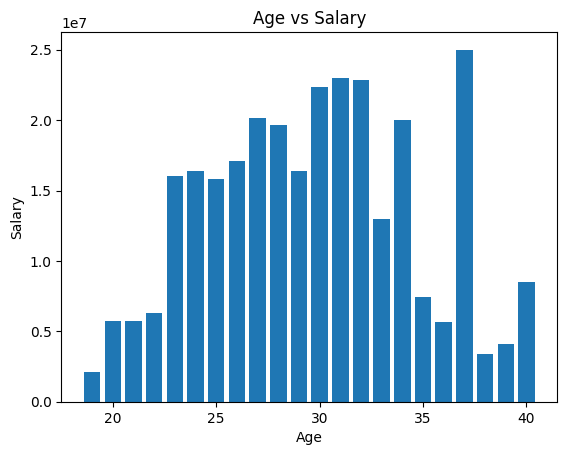

The correlation coefficient is : 0.21400941226570971


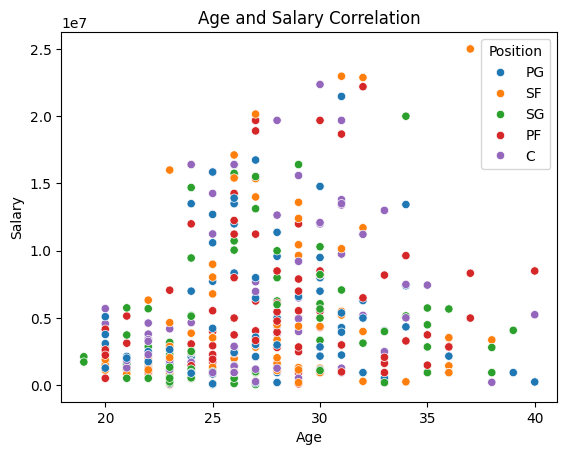

In [24]:
corelation=df['Age'].corr(df['Salary'])
plt.bar(df['Age'], df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()
print('The correlation coefficient is :',corelation)

#scatter chart
se.scatterplot(x='Age',y='Salary',hue='Position',data=df)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age and Salary Correlation')
plt.show()